# Build a machine learning model to create group of mall customers based on their annual income and spending score for a given dataset

In [2]:
from sklearn.cluster import KMeans
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/home/admin1/machine_learning/week12//Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
len(data['Annual Income (k$)'].unique())

64

In [9]:
len(data['CustomerID'].unique())

200

In [10]:
data.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [11]:
data.isnull().any().any()

False

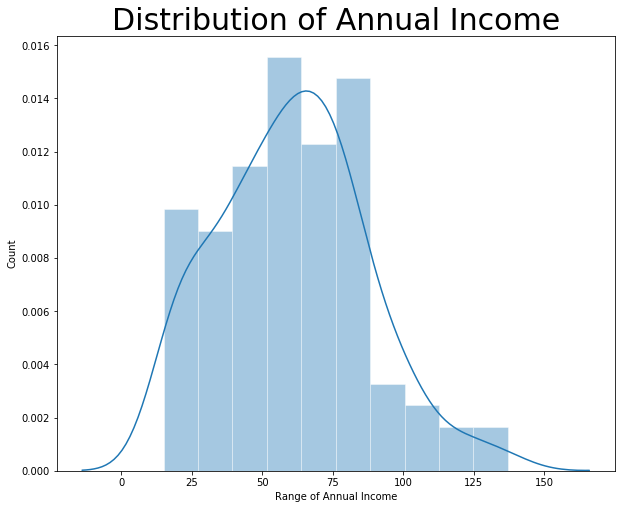

In [12]:
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(1,1,1)
sb.set(style = 'whitegrid')
sb.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 30)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

By looking at the distribution of Range of Annual Income we can infer that
There are very few people who earn more than 100 US dollars
Most of the people earn in the range of 50 to 75 US dollars

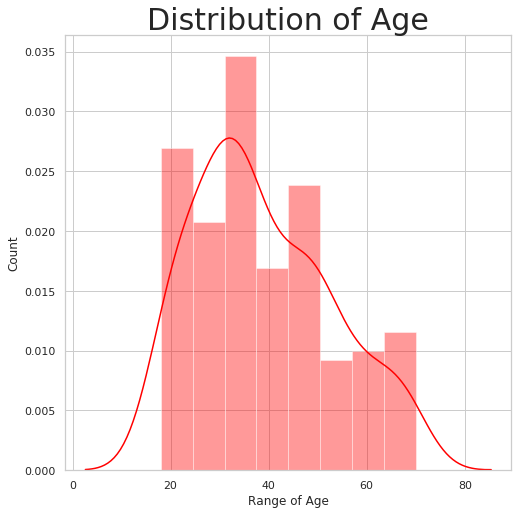

In [13]:
fig, ax = plt.subplots(figsize = (8,8))
plt.subplot(1, 1, 1)
sb.set(style = 'whitegrid')
sb.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 30)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

By looking at the distribution of age we can infer that
Most of the people visting mall lie between the age group of 30-35
Whereas the the senior citizens age group is the least frequent visitor in the Mall.
Youngsters are lesser in number as compared to the Middle aged people.

In [14]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

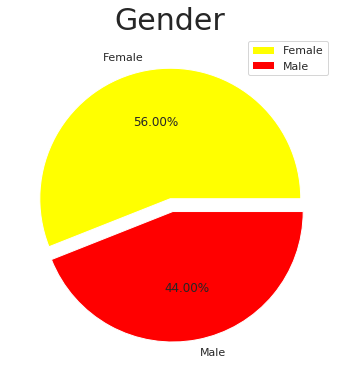

In [15]:
fig, ax = plt.subplots(figsize = (7,6))
plt.pie(x = data['Genre'].value_counts(),
       colors = ['yellow', 'red'],
       explode = [0, 0.1],
       labels = ['Female', 'Male'],
       autopct = '%.2f%%')
plt.legend()
plt.title('Gender', fontsize = 30)
plt.axis('off')
plt.show()

From the above piechart we can infer that most of the peoples visiting malls are Females with a share of 56% 

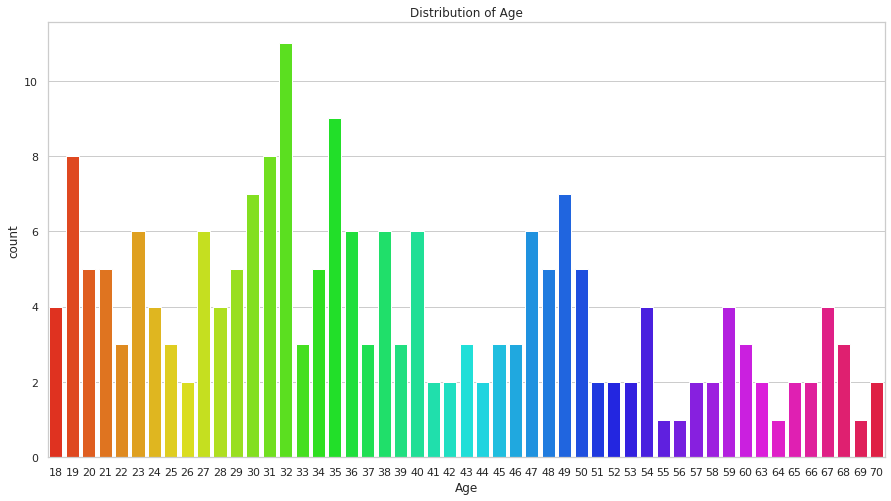

In [16]:
fig, ax = plt.subplots(figsize = (15, 8))
sb.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

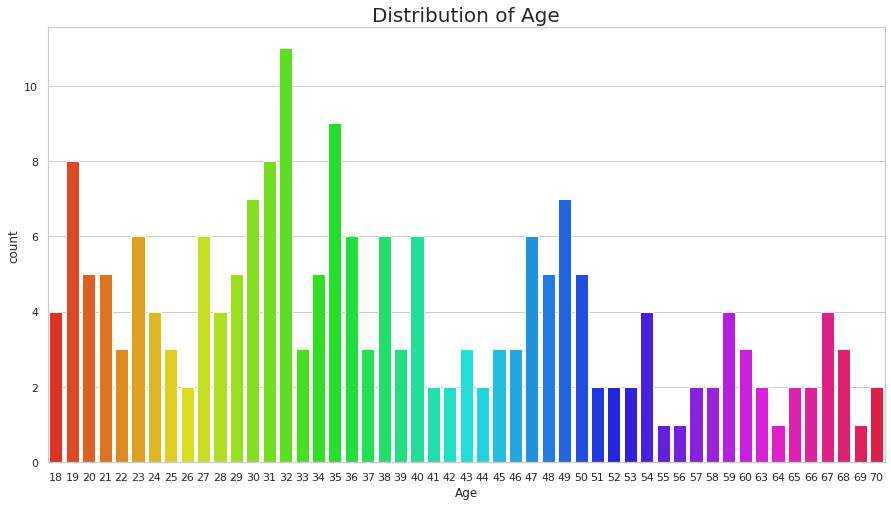

In [17]:
fig, ax = plt.subplots(figsize = (15, 8))
sb.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

By looking at the above graph
It can be seen that the Ages from 27 to 40 are very much frequent but there is no clear pattern,
we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison 
People of Age 55, 56, 69, 64 are very less frequent in the Malls.
People at Age 32 are the Most Frequent Visitors in the Mall.

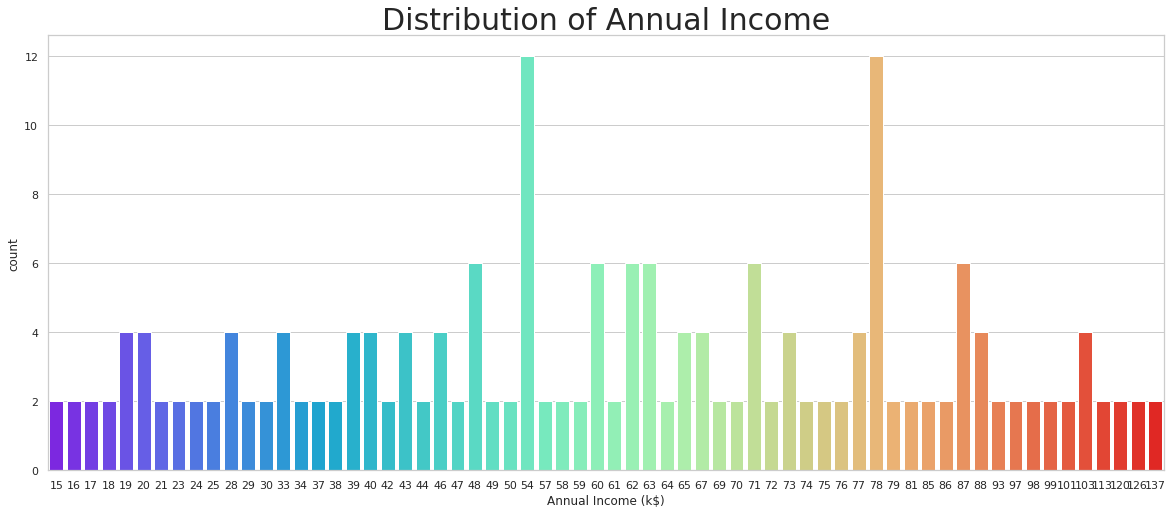

In [18]:
fig, ax = plt.subplots(figsize = (20, 8))
sb.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 30)
plt.show()

By looking at the above graph it can be seen that
Many people have income of 54 and 78 US dollars
The least income is 15 US dollars

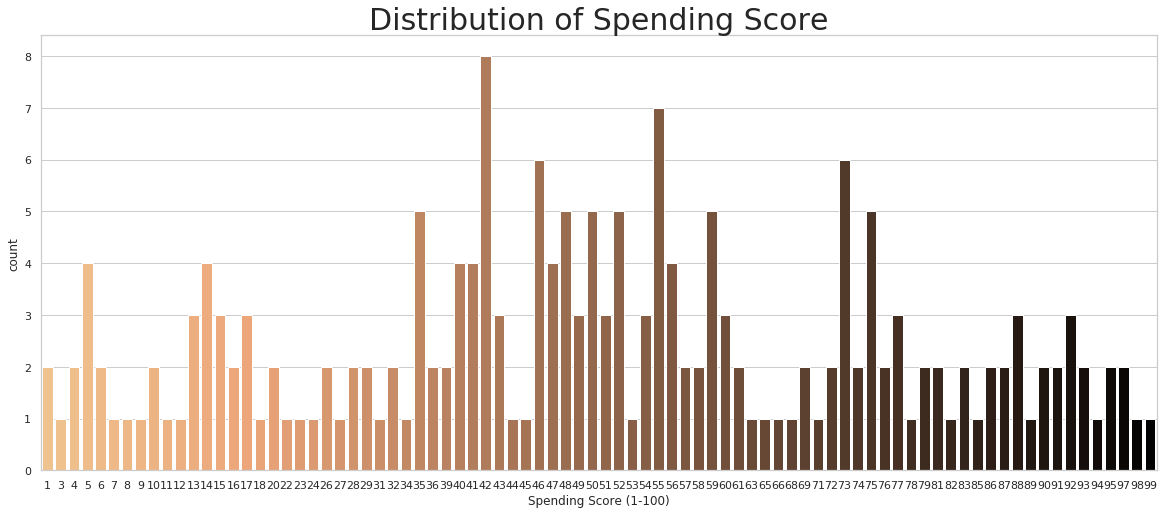

In [19]:
fig, ax = plt.subplots(figsize = (20, 8))
sb.countplot(data['Spending Score (1-100)'], palette = 'copper_r')
plt.title('Distribution of Spending Score', fontsize = 30)
plt.show()

From the above graph we can conclude that most of the customers have their Spending Score in the range of 35-60
There are customers having a Spending Score of 1 also there are customers having a Spending Score of 99

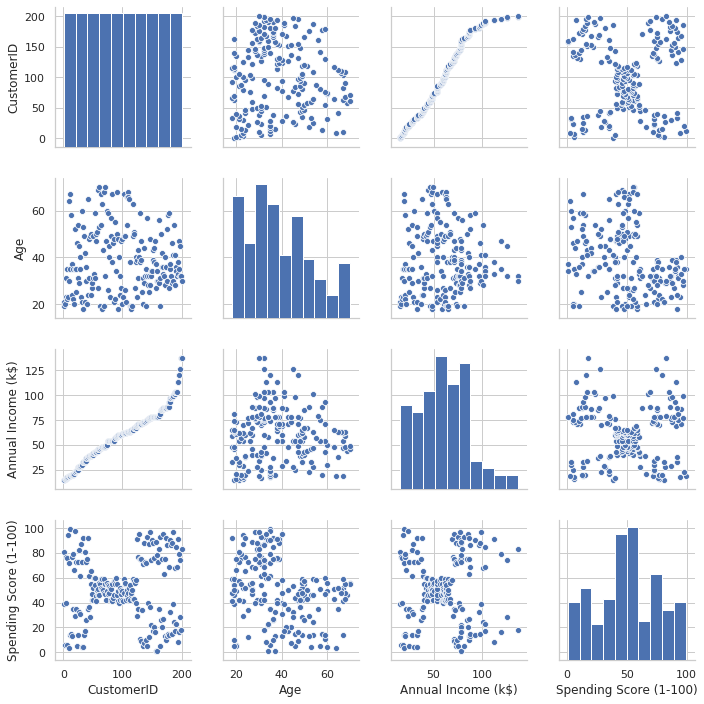

In [20]:
sb.pairplot(data)
plt.show()

From the above pairplot we can conclude that there is somewhat linear relationship between CustomerID and Annual Income

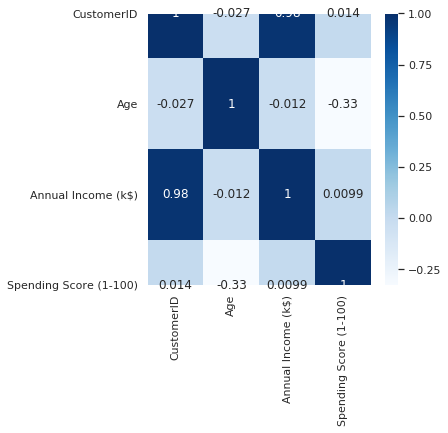

In [21]:
fig, ax = plt.subplots(figsize = (5,5))
sb.heatmap(data.corr(), annot = True, cmap = 'Blues')
plt.show()

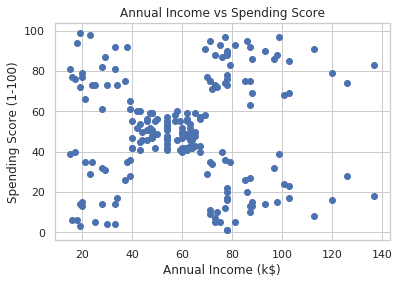

In [22]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [23]:
x = data.iloc[:, 3:].values

In [24]:
wcss = [ ]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)


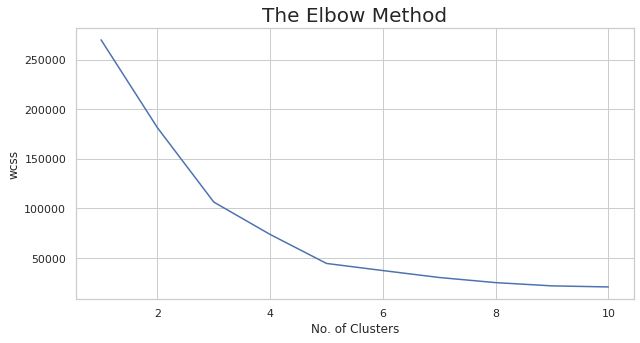

In [25]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In [26]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# Visualizaing the Clusters

In [27]:
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

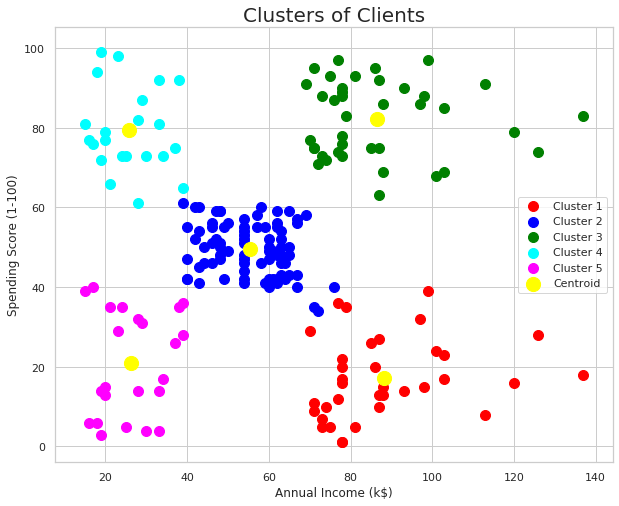

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0,1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(x[y_means == 1, 0], x[y_means == 1,1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(x[y_means == 2, 0], x[y_means == 2,1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(x[y_means == 3, 0], x[y_means == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(x[y_means == 4, 0], x[y_means == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 200, c = 'yellow', label = 'Centroid')

plt.legend()

plt.title('Clusters of Clients', size = 20)

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score (1-100)')

plt.show()